# **Combine All Assignments**
### Combine Data Cleaning, Feature Selection, Modeling and Interpretability into one report 

## **ML Data Cleaning and Feature Selection**

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
        
#importing Packages
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pylab as plt
import matplotlib.ticker as mtick 
from sklearn.preprocessing import StandardScaler 
from scipy.stats import norm, skew #for some statistics
from scipy import stats

#Reading Dat
from google.colab import files 
uploaded = files.upload()

Saving watson_healthcare_modified.csv to watson_healthcare_modified (5).csv


**INTRODUCTION**

**Goal of creating this Notebook🎯**

Attrition is the departure of employees from the organization for any reason (voluntary or involuntary), including resignation, termination, death or retirement. Attrition rate is the rate at which employees leave an organization divided by the average number of employees at the organization over a given period of time. The aim of the Notebook is to check the quality of the data and determine which features are important. The notebook has used statistical methods like p-value, t-statistics and visualization techniques like Q-Q plot, scatter plot, box-plot of python's matplotlib and seaborn library to answer below questions about the dataset


* What are the data types? (Only numeric and categorical)
* Are there missing values?
* What are the likely distributions of the numeric variables?
* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)
* Which independent variables have missing data? How much? 
* Do the training and test sets have the same data?
* In the predictor variables independent of all the other predictor variables?
* Which predictor variables are the most important?
* Do the ranges of the predictor variables make sense?
* What are the distributions of the predictor variables?   
* Remove outliers and keep outliers (does if have an effect of the final predictive model)?
* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

**Data Set**
The data set consists of :

1. 8 characteristics of attrition i.e. Age, JobLevel, MonthlyIncome, TotalWorkingYears, YearsInCurrentRole, YearsSinceLastPromotion, YearsAtCompany, YearsWithCurrManager - The independent variables.

2. Attriton yes or no - The dependent variable.

3. There are a total of 1676 observations.

In [2]:
data = pd.read_csv("/content/watson_healthcare_modified.csv")
df = data.copy()
df_new= df.copy()

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeID,1676.0,1.456796e+06,248748.624383,1025177.0,1235831.75,1464606.0,1667992.00,1886378.0
Age,1676.0,3.686635e+01,9.129126,18.0,30.00,36.0,43.00,60.0
DailyRate,1676.0,8.005579e+02,401.594438,102.0,465.00,796.5,1157.00,1499.0
DistanceFromHome,1676.0,9.221957e+00,8.158118,1.0,2.00,7.0,14.00,29.0
Education,1676.0,2.907518e+00,1.025835,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1676.0,1.000000e+00,0.000000,1.0,1.00,1.0,1.00,1.0
EnvironmentSatisfaction,1676.0,2.714797e+00,1.097534,1.0,2.00,3.0,4.00,4.0
HourlyRate,1676.0,6.547017e+01,20.207572,30.0,48.00,65.5,83.00,100.0
JobInvolvement,1676.0,2.724940e+00,0.714121,1.0,2.00,3.0,3.00,4.0
JobLevel,1676.0,2.066826e+00,1.113423,1.0,1.00,2.0,3.00,5.0


In [4]:
df

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8


In [5]:
df.Attrition = df.Attrition.map(dict(Yes=1, No=0))

In [6]:
df

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,0,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,0,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,1,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,0,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,0,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,1,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,0,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,0,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,0,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8


In [7]:
#finding out datatypes
df.dtypes

EmployeeID                   int64
Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
Shift                        int64
TotalWorkingYears   

Above are all the datatypes present in dataset.
Datatypes available are int64 and object.

In [8]:
#missing values
df.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There is no missing data in the dataset, which means it is not required to impute or remove the null values from the data.

In [9]:
df.drop(columns = ["EmployeeID","EmployeeCount","StandardHours"],inplace = True)

**What are the likely distributions of the numeric variables?**

<Figure size 576x360 with 0 Axes>

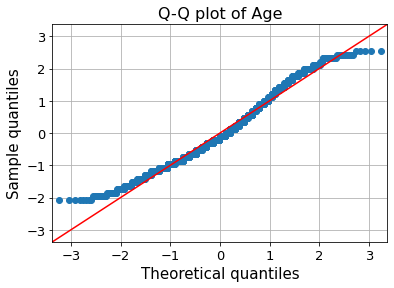

<Figure size 576x360 with 0 Axes>

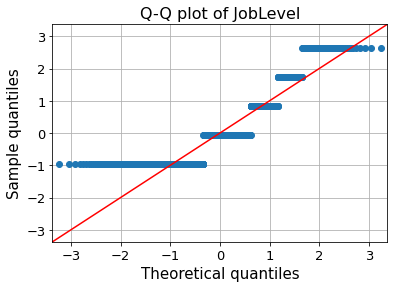

<Figure size 576x360 with 0 Axes>

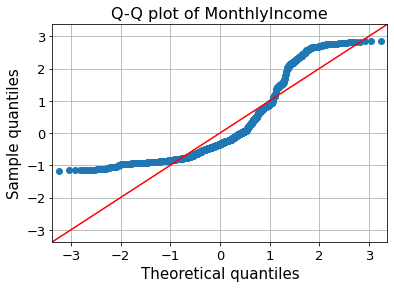

<Figure size 576x360 with 0 Axes>

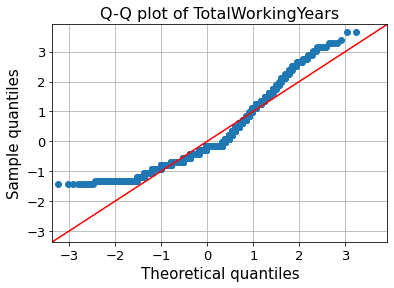

<Figure size 576x360 with 0 Axes>

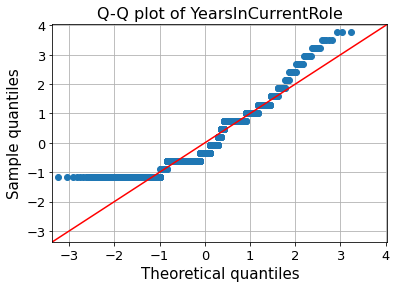

<Figure size 576x360 with 0 Axes>

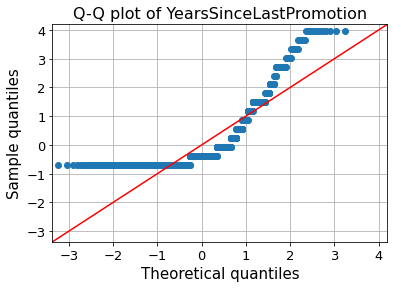

<Figure size 576x360 with 0 Axes>

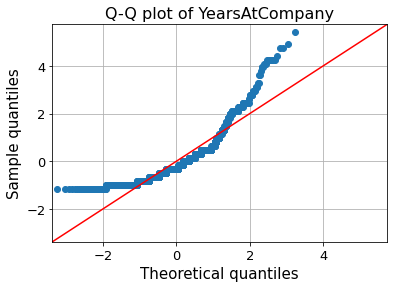

<Figure size 576x360 with 0 Axes>

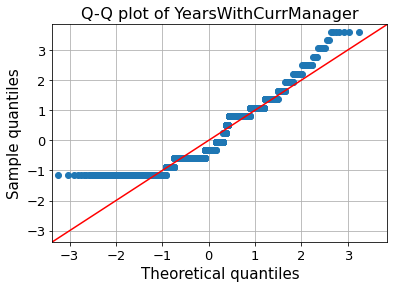

In [10]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm=data[['Age', 'JobLevel', 'MonthlyIncome', 'TotalWorkingYears' , 'YearsInCurrentRole' , 'YearsSinceLastPromotion' , 'YearsAtCompany' , 'YearsWithCurrManager']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

In [11]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Maternity,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Maternity,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Maternity,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Maternity,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,26,1,Travel_Rarely,471,Neurology,24,3,Technical Degree,3,Male,...,3,2,0,1,3,1,1,0,0,0
1672,46,0,Travel_Rarely,1125,Cardiology,10,3,Marketing,3,Female,...,3,3,1,15,3,3,3,2,1,2
1673,20,0,Travel_Rarely,959,Maternity,1,3,Life Sciences,4,Female,...,3,4,0,1,0,4,1,0,0,0
1674,39,0,Travel_Rarely,466,Neurology,1,1,Life Sciences,4,Female,...,3,3,1,21,3,3,21,6,11,8


In [12]:
from sklearn import preprocessing

# Create x to store scaled values as floats
x = df[['Attrition']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df[['Attrition']] = pd.DataFrame(x_scaled)

In [13]:
#data after normalizing and feature creation
data.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


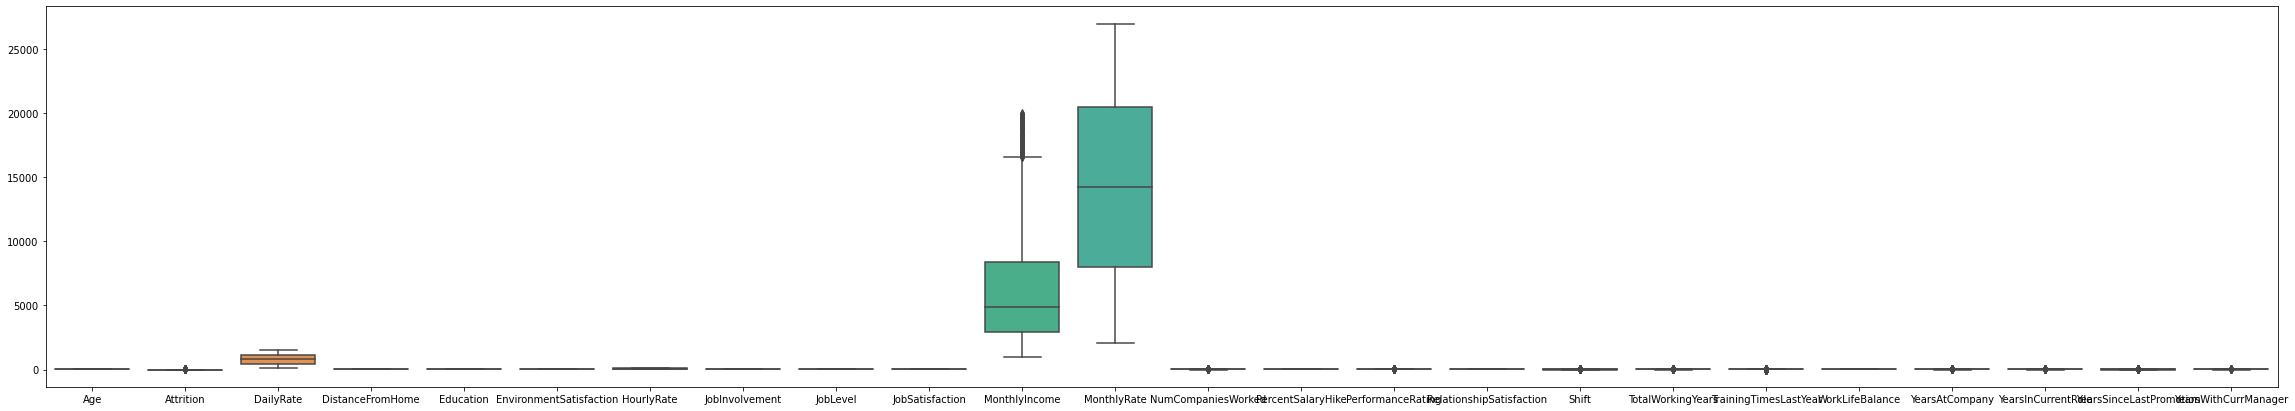

In [14]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(40,7))
sns.boxplot(data=df)

**Modelling using correlation**

In [15]:
#checking the correlation between all the features in the data
df.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.239984,0.001441,-0.010079,0.204655,0.008945,0.034671,0.034193,0.518333,-0.015848,...,0.005246,0.058528,0.037117,0.692512,-0.015408,-0.004878,0.319012,0.222655,0.217212,0.215909
Attrition,-0.239984,1.000000,-0.053892,0.105580,-0.038843,-0.101278,-0.036300,-0.166036,-0.207634,-0.081881,...,0.010728,-0.020462,-0.158322,-0.234182,-0.054836,-0.090513,-0.201373,-0.207891,-0.086207,-0.201087
DailyRate,0.001441,-0.053892,1.000000,-0.009227,-0.015881,0.010620,0.027128,0.058864,0.009005,0.032115,...,0.003353,0.014539,0.054407,0.009378,0.001901,-0.028549,-0.026892,0.019651,-0.034571,-0.025272
DistanceFromHome,-0.010079,0.105580,-0.009227,1.000000,0.015937,-0.019730,0.026947,0.010281,-0.023455,-0.004758,...,0.020482,0.005482,0.029180,-0.017663,-0.055471,-0.037821,-0.007420,0.011448,-0.000126,0.000403
Education,0.204655,-0.038843,-0.015881,0.015937,1.000000,-0.031925,0.017996,0.041046,0.093227,-0.003957,...,-0.020664,-0.005750,0.024451,0.143324,-0.014070,0.003933,0.057461,0.051029,0.045785,0.055096
EnvironmentSatisfaction,0.008945,-0.101278,0.010620,-0.019730,-0.031925,1.000000,-0.057505,-0.007220,0.008277,0.001518,...,-0.029104,0.003221,0.005283,0.000208,-0.017722,0.027262,-0.000448,0.012241,0.005866,-0.012417
HourlyRate,0.034671,-0.036300,0.027128,0.026947,0.017996,-0.057505,1.000000,0.034741,-0.018830,-0.073942,...,-0.000370,0.000601,0.051862,0.005988,-0.007194,-0.009956,-0.014742,-0.016776,-0.028642,-0.021436
JobInvolvement,0.034193,-0.166036,0.058864,0.010281,0.041046,-0.007220,0.034741,1.000000,-0.013660,-0.039738,...,-0.017970,0.045107,0.025999,-0.001576,-0.031580,-0.006931,-0.013652,0.020541,-0.022153,0.031574
JobLevel,0.518333,-0.207634,0.009005,-0.023455,0.093227,0.008277,-0.018830,-0.013660,1.000000,-0.012497,...,-0.008759,0.030606,0.010478,0.780929,-0.004251,0.047481,0.532529,0.387624,0.343102,0.379717
JobSatisfaction,-0.015848,-0.081881,0.032115,-0.004758,-0.003957,0.001518,-0.073942,-0.039738,-0.012497,1.000000,...,0.008859,-0.018232,0.017740,-0.021435,-0.003440,-0.017280,0.005376,-0.001337,-0.013595,-0.023042


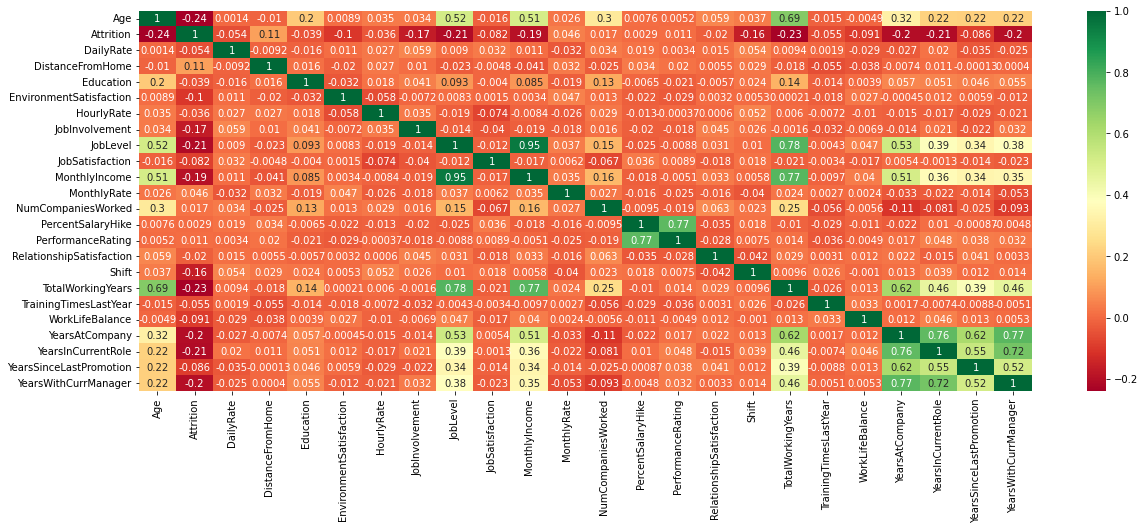

In [16]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

**Modelling using OLS Regression**

In [17]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(df['Attrition'], df[['Age', 'JobLevel', 'MonthlyIncome', 'TotalWorkingYears' , 'YearsInCurrentRole' , 'YearsSinceLastPromotion' , 'YearsAtCompany' , 'YearsWithCurrManager']]).fit()

# Print out the statistics
model.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Attrition   R-squared (uncentered):                   0.130
Model:                            OLS   Adj. R-squared (uncentered):              0.126
Method:                 Least Squares   F-statistic:                              31.29
Date:                Tue, 13 Dec 2022   Prob (F-statistic):                    5.00e-46
Time:                        00:16:41   Log-Likelihood:                         -475.30
No. Observations:                1676   AIC:                                      966.6
Df Residuals:                    1668   BIC:                                      1010.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Age                         0.0058      0.001      9.512      0.000       0.005       0.007
JobLevel                    0.0544      0.023      2.412      0.016       0.010       0.099
MonthlyIncome           -1.053e-05   5.38e-06     -1.956      0.051   -2.11e-05    3.16e-08
TotalWorkingYears          -0.0112      0.002     -5.950      0.000      -0.015      -0.008
YearsInCurrentRole         -0.0081      0.004     -2.270      0.023      -0.015      -0.001
YearsSinceLastPromotion     0.0074      0.003      2.370      0.018       0.001       0.014
YearsAtCompany              0.0014      0.003      0.517      0.605      -0.004       0.007
YearsWithCurrManager       -0.0051      0.004     -1.391      0.164      -0.012       0.002
==============================================================================
Omnibus:                      673.143   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1973.354
Skew:                           2.160   Prob(JB):                         0.00
Kurtosis:                       6.098   Cond. No.                     2.31e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Building the Model  
Train and Test split**

In [18]:
from sklearn.model_selection import  train_test_split

X = df[['Age', 'JobLevel', 'MonthlyIncome', 'TotalWorkingYears' , 'YearsInCurrentRole' , 'YearsSinceLastPromotion' , 'YearsAtCompany' , 'YearsWithCurrManager']]

y = df['Attrition']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

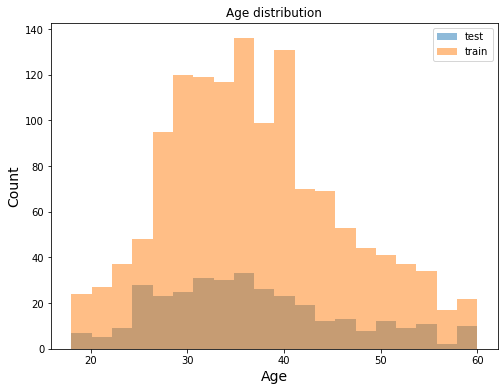

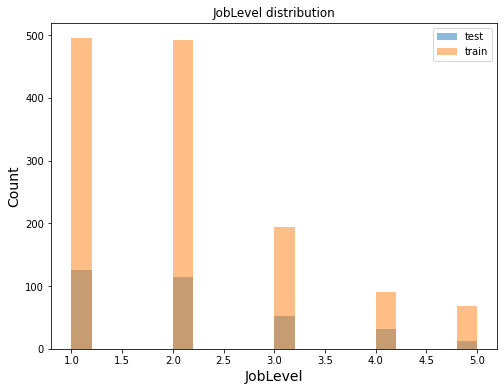

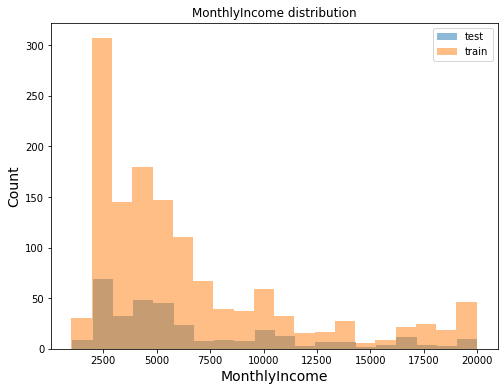

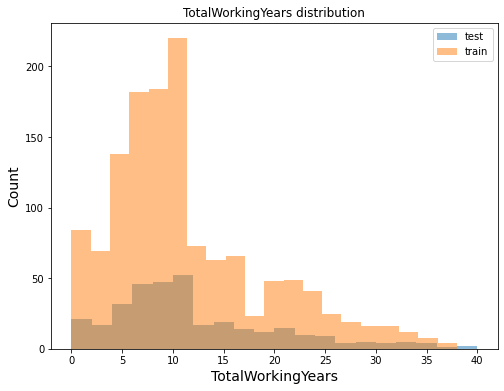

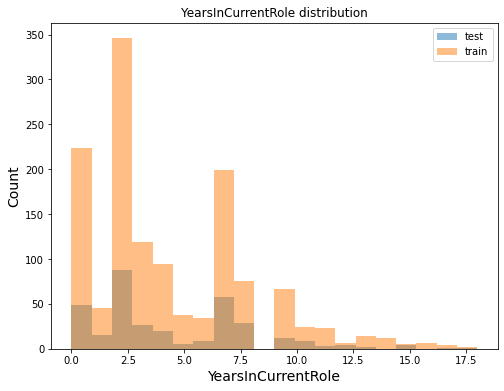

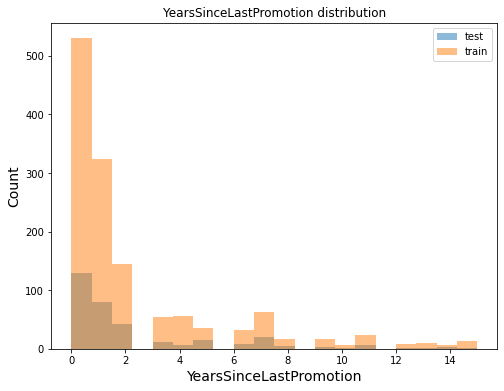

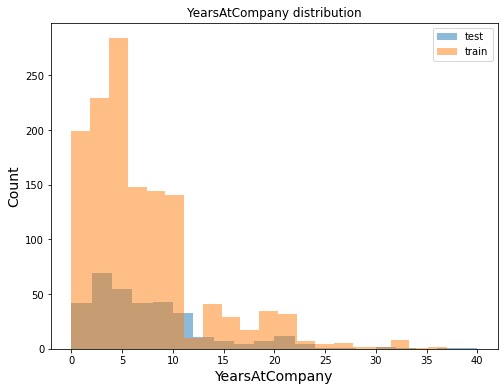

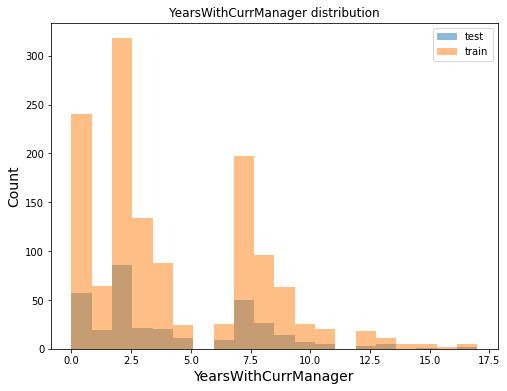

In [19]:
# Looking the data for test, training and validation set
X_test_plot = X_test[['Age', 'JobLevel', 'MonthlyIncome', 'TotalWorkingYears' , 'YearsInCurrentRole' , 'YearsSinceLastPromotion' , 'YearsAtCompany' , 'YearsWithCurrManager']]


X_train_plot = X_train[['Age', 'JobLevel', 'MonthlyIncome', 'TotalWorkingYears' , 'YearsInCurrentRole' , 'YearsSinceLastPromotion' , 'YearsAtCompany' , 'YearsWithCurrManager']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

**Modelling Using Logistic Regression**

In [20]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

# Print the prediction accuracy
from sklearn import metrics
prediction_test = model.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8869047619047619


In [21]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [22]:
#Understanding the important features 
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0119 ± 0.0136,YearsSinceLastPromotion
0 ± 0.0000,YearsWithCurrManager
0 ± 0.0000,YearsAtCompany
0 ± 0.0000,YearsInCurrentRole
0 ± 0.0000,TotalWorkingYears
0 ± 0.0000,MonthlyIncome
0 ± 0.0000,JobLevel
0 ± 0.0000,Age


**REMOVING OUTLIER**

In [23]:
scaler= StandardScaler()


X_new = df_new[['Age', 'JobLevel', 'MonthlyIncome', 'TotalWorkingYears' , 
                'YearsInCurrentRole' , 'YearsSinceLastPromotion' , 'YearsAtCompany' ,
                'YearsWithCurrManager']]

y_new = df_new['Attrition']

X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.2, random_state=1)

X_new = scaler.fit_transform(X_new)


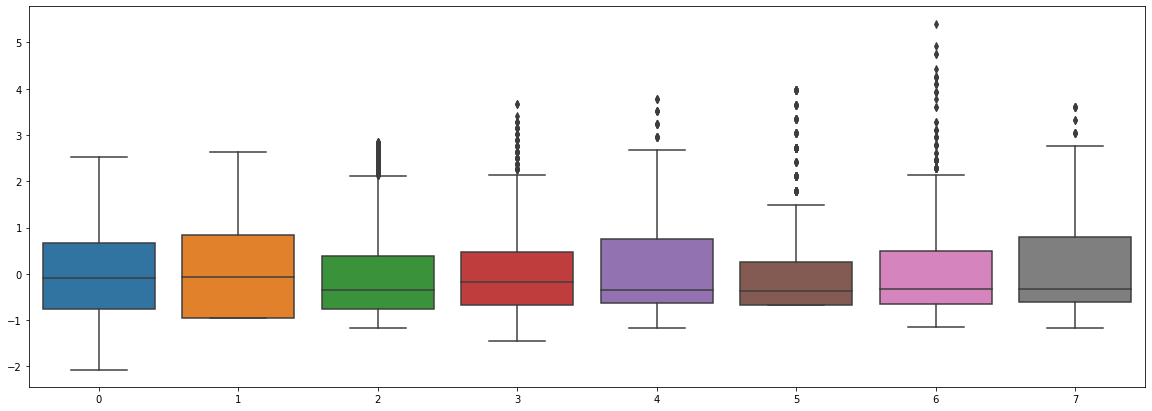

In [24]:
plt.figure(figsize=(20,7))
sns.boxplot(data=X_new)

In [25]:
Q1Age,Q3Age = np.percentile(df_new['Age'] , [25,75])
IQR1 = Q3Age - Q1Age

UAge =Q3Age + 1.5*IQR1

LAge = Q1Age - 1.5*IQR1

print(UAge)
print(LAge)

df_new.drop(df_new[df_new['Age'] < LAge].index, inplace=True)
df_new.drop(df_new[df_new['Age'] > UAge].index, inplace=True)

62.5
10.5


In [26]:
Q1Job,Q3Job = np.percentile(df_new['JobLevel'] , [25,75])
IQR2 = Q3Job - Q1Job

UJob =Q3Job + 1.5*IQR2

LJob = Q1Job - 1.5*IQR2

print(UJob)
print(LJob)

df_new.drop(df_new[df_new['JobLevel'] < LJob].index, inplace=True)
df_new.drop(df_new[df_new['JobLevel'] > UJob].index, inplace=True)

6.0
-2.0


In [27]:
Q1Inc,Q3Inc = np.percentile(df_new['MonthlyIncome'] , [25,75])
IQR3 = Q3Inc - Q1Inc

UInc =Q3Inc + 1.5*IQR3

LInc = Q1Inc - 1.5*IQR3

print(UInc)
print(LInc)

df_new.drop(df_new[df_new['MonthlyIncome'] < LInc].index, inplace=True)
df_new.drop(df_new[df_new['MonthlyIncome'] > UInc].index, inplace=True)


16558.25
-5249.75


In [28]:
Q1Role,Q3Role= np.percentile(df_new['YearsInCurrentRole'] , [25,75])
IQR5 = Q3Role - Q1Role

URole =Q3Role + 1.5*IQR5

LRole = Q1Role - 1.5*IQR5

print(URole)
print(LRole)

df_new.drop(df_new[df_new['YearsInCurrentRole'] < LRole].index, inplace=True)
df_new.drop(df_new[df_new['YearsInCurrentRole'] > URole].index, inplace=True)


14.5
-5.5


In [29]:
Q1TWY,Q3TWY = np.percentile(df_new['TotalWorkingYears'] , [25,75])
IQR4 = Q3TWY - Q1TWY

UTWY =Q3TWY + 1.5*IQR4

LTWY = Q1TWY - 1.5*IQR4

print(UTWY)
print(LTWY)

df_new.drop(df_new[df_new['TotalWorkingYears'] < LTWY].index, inplace=True)
df_new.drop(df_new[df_new['TotalWorkingYears'] > UTWY].index, inplace=True)

23.5
-4.5


In [30]:
Q1Comp,Q3Comp = np.percentile(df_new['YearsAtCompany'] , [25,75])
IQR7 = Q3Comp - Q1Comp

UComp =Q3Comp + 1.5*IQR7

LComp = Q1Comp - 1.5*IQR7

print(UComp)
print(LComp)

df_new.drop(df_new[df_new['YearsAtCompany'] < LComp].index, inplace=True)
df_new.drop(df_new[df_new['YearsAtCompany'] > UComp].index, inplace=True)

18.375
-6.625


In [31]:
Q1Man,Q3Man = np.percentile(df_new['YearsWithCurrManager'] , [25,75])
IQR8 = Q3Man - Q1Man

UMan =Q3Man + 1.5*IQR8

LMan = Q1Man - 1.5*IQR8

print(UMan)
print(LMan)

df_new.drop(df_new[df_new['YearsWithCurrManager'] < LMan].index, inplace=True)
df_new.drop(df_new[df_new['YearsWithCurrManager'] > UMan].index, inplace=True)

14.5
-5.5


In [32]:
df_new.describe()

,EmployeeID,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.430000e+03,1430.000000,1430.000000,1430.000000,1430.000000,1430.0,1430.000000,1430.000000,1430.000000,1430.000000,...,1430.000000,1430.0,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000
mean,1.458065e+06,35.019580,801.620280,9.360140,2.897203,1.0,2.709091,65.602797,2.733566,1.734266,...,2.692308,80.0,0.813986,8.825175,2.821678,2.764336,5.613986,3.788811,1.715385,3.630070
std,2.482894e+05,8.258145,399.763263,8.137703,1.027913,0.0,1.092945,20.246632,0.715464,0.744008,...,1.082534,0.0,0.868756,4.912694,1.309792,0.708630,3.875685,3.204508,2.493822,3.133747
min,1.025177e+06,18.000000,103.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.237442e+06,29.000000,468.250000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,5.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000
50%,1.464520e+06,34.000000,800.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,2.000000
75%,1.668442e+06,40.000000,1153.000000,14.750000,4.000000,1.0,4.000000,83.000000,3.000000,2.000000,...,4.000000,80.0,1.000000,11.000000,3.000000,3.000000,8.000000,7.000000,2.000000,7.000000
max,1.886378e+06,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,4.000000,...,4.000000,80.0,3.000000,23.000000,6.000000,4.000000,18.000000,14.000000,15.000000,14.000000


In [33]:
scaler= StandardScaler()


X_new = df_new[['Age', 'JobLevel', 'MonthlyIncome', 'TotalWorkingYears' , 
                'YearsInCurrentRole' , 'YearsSinceLastPromotion' , 'YearsAtCompany' ,
                'YearsWithCurrManager']]

y_new = df_new['Attrition']

X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.2, random_state=1)

X_new = scaler.fit_transform(X_new)


In [34]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_new_train, y_new_train)

# Print the prediction accuracy
from sklearn import metrics
prediction_new_test = model.predict(X_new_test)
print (metrics.accuracy_score(y_new_test, prediction_new_test))

0.8426573426573427


**IMPUTATION**

In [35]:
df_null_1=df[['Age','JobLevel','YearsAtCompany']].copy()
df_null_5=df[['Age','JobLevel','YearsAtCompany']].copy()
df_null_10=df[['Age','JobLevel','YearsAtCompany']].copy()

# Creating a list of 1% data and filling with NaN
empty_1=df_null_1['JobLevel'].sample(frac=0.01, replace=True, random_state=1)
df_null_1.loc[empty_1.index, 'JobLevel'] = np.NaN

# Creating a list of 5% data and filling with NaN
empty_5=df_null_5['JobLevel'].sample(frac=0.05, replace=True, random_state=1)
df_null_5.loc[empty_5.index, 'JobLevel'] = np.NaN

# Creating a list of 10% data and filling with NaN
empty_10=df_null_10['JobLevel'].sample(frac=0.1, replace=True, random_state=1)
df_null_10.loc[empty_10.index, 'JobLevel'] = np.NaN

In [36]:
#import SimpleImputer
from sklearn.impute import SimpleImputer

#Fill with most frequent
simple_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

#For 1%
df_filled_1=pd.DataFrame(simple_imputer.fit_transform(df_null_1))
df_filled_1.columns=df_null_1.columns
df_filled_1.index=df_null_1.index
job_filled_1=df_filled_1.iloc[empty_1.index].JobLevel

#For 5%
df_filled_5=pd.DataFrame(simple_imputer.fit_transform(df_null_5))
df_filled_5.columns=df_null_5.columns
df_filled_5.index=df_null_5.index
job_filled_5=df_filled_5.iloc[empty_5.index].JobLevel

#For 10%
df_filled_10=pd.DataFrame(simple_imputer.fit_transform(df_null_10))
df_filled_10.columns=df_null_10.columns
df_filled_10.index=df_null_10.index
job_filled_10=df_filled_10.iloc[empty_10.index].JobLevel

In [37]:
# Calculation percentage of residual errors
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [38]:
# Percentage of Residual errors at 1%, 5% and 10% data for monthly Charges
MAPE(empty_1, job_filled_1), MAPE(empty_5, job_filled_5), MAPE(empty_10, job_filled_10)

(49.023744518904614, 45.725159178549, 46.663296655067555)

In [39]:
#import SimpleImputer
from sklearn.impute import SimpleImputer

#Fill with most frequent
simple_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

#For 1%
df_filled_1=pd.DataFrame(simple_imputer.fit_transform(df_null_1))
df_filled_1.columns=df_null_1.columns
df_filled_1.index=df_null_1.index
job_filled_1=df_filled_1.iloc[empty_1.index].JobLevel

#For 5%
df_filled_5=pd.DataFrame(simple_imputer.fit_transform(df_null_5))
df_filled_5.columns=df_null_5.columns
df_filled_5.index=df_null_5.index
job_filled_5=df_filled_5.iloc[empty_5.index].JobLevel

#For 10%
df_filled_10=pd.DataFrame(simple_imputer.fit_transform(df_null_10))
df_filled_10.columns=df_null_10.columns
df_filled_10.index=df_null_10.index
job_filled_10=df_filled_10.iloc[empty_10.index].JobLevel

In [40]:
# Percentage of Residual errors at 1%, 5% and 10% data for monthly Charges
MAPE(empty_1, job_filled_1), MAPE(empty_5, job_filled_5), MAPE(empty_10, job_filled_10)

(37.745098039215684, 40.57539682539681, 39.88095238095239)

In [41]:
#import KNNImputer
from sklearn.impute import KNNImputer

#Fill with most frequent
simple_imputer = KNNImputer(missing_values=np.nan)

#For 1%
df_filled_1=pd.DataFrame(simple_imputer.fit_transform(df_null_1))
df_filled_1.columns=df_null_1.columns
df_filled_1.index=df_null_1.index
job_filled_1=df_filled_1.iloc[empty_1.index].JobLevel

#For 5%
df_filled_5=pd.DataFrame(simple_imputer.fit_transform(df_null_5))
df_filled_5.columns=df_null_5.columns
df_filled_5.index=df_null_5.index
job_filled_5=df_filled_5.iloc[empty_5.index].JobLevel

#For 10%
df_filled_10=pd.DataFrame(simple_imputer.fit_transform(df_null_10))
df_filled_10.columns=df_null_10.columns
df_filled_10.index=df_null_10.index
job_filled_10=df_filled_10.iloc[empty_10.index].JobLevel

In [42]:
# Percentage of Residual errors at 1%, 5% and 10% data for monthly Charges
MAPE(empty_1, job_filled_1), MAPE(empty_5, job_filled_5), MAPE(empty_10, job_filled_10)

(37.05882352941177, 28.829365079365076, 32.773809523809526)

**Answers for the given questions**

**What are the data types?**   
Both data types are there i.e. categorical and numeric.



**Are there missing values?**  
There are no missing values.



**Which independent variables have missing data? How much?**  
A: No independent variables have any missing data or zeros.



**Which independent variables are useful to predict a target (dependent variable)?**    
A: Below variables are useful to predict
* Age
* JobLevel
* MonthlyIncome
* TotalWorkingYears
* YearsInCurrentRole
* YearsSinceLastPromotion
* YearsAtCompany
* YearsWithCurrManager  

The methods used are Correlation, OLS regression and logistic Regression.



**Which predictor variables are the most important?**    
A: Below variables are most important
* YearsSinceLastPromotion
* YearsAtCompany
* YearsWithCurrManager
* JobLevel



**Do the training and test sets have the same data?**    
A: Yes they have same distribution of data as they have been derived from same dataset and split into 80/20 split.




**In the predictor variables independent of all the other predictor variables?**    
A: Yes there is multi-colinearity between independent variables.




**Do the ranges of the predictor variables make sense?**     
A: No it doesnt make sense as monthly income and monthly rate have large range, so we have standarized the data.


**Remove outliers and keep outliers (does if have an effect of the final predictive model)?**   
A: Yes there was an effect on the final predictive model after removing the outliers as the accuracy changed.


**Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.
**  

A: Imputing the values using KNN imputer, it performed better compared to Mean Simple Imputer and most frequent simple imputer.


**LICENSE**   
Copyright (c) 2022 udayshelke

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

## **AUTO ML**

In [43]:
#Installing Pycaret
# !pip install pycaret[full] --ignore-installed
!pip install pycaret
!pip install numpy==1.20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Jinja2-3.0.0-py3-none-any.whl (133 kB)
  Using cached numpy-1.19.5-cp38-cp38-manylinux2010_x86_64.whl (14.9 MB)
  Using cached Jinja2-2.11.3-py2.py3-none-any.whl (125 kB)
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 3.1.2
    Uninstalling Jinja2-3.1.2:
      Successfully uninstalled Jinja2-3.1.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.0
    Uninstalling numpy-1.20.0:
      Successfully uninstalled numpy-1.20.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
jaxlib 0.3.25+cuda11.cudnn805 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
jax 0.3.25 requires numpy>=1.20, but you have nu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.20.0-cp38-cp38-manylinux2010_x86_64.whl (15.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.20.0 which is incompatible.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 2.3.8 which is incompatible.
eli5 0.13.0 requires jinja2>=3.0.0, but you have jinja2 2.11.3 which is incompatible.
cmdstanpy 1.0.8 requires numpy>=1.21, but you have numpy 1.20.0 which is incompatible.


## Abstract : 


Attrition is the departure of employees from the organization for any reason (voluntary or involuntary), including resignation, termination, death or retirement. Attrition rate is the rate at which employees leave an organization divided by the average number of employees at the organization over a given period of time. The aim of the Notebook is to check the quality of the data and determine which features are important. The notebook has used statistical methods like p-value, t-statistics and visualization techniques like Q-Q plot, scatter plot, box-plot of python's matplotlib and seaborn library to answer below questions about the dataset.

* Is the relationship significant?

* Are any model assumptions violated?

* Is there any multicollinearity in the model?

* In the multivariate models are predictor variables independent of all the other predictor variables?

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

* Does the model make sense?

* Does regularization help?

* Which independent variables are significant?

* Which hyperparameters are important?


In [44]:
employee_attr = pd.read_csv("/content/watson_healthcare_modified.csv") 

# Analyzing the numeric features


<Figure size 576x360 with 0 Axes>

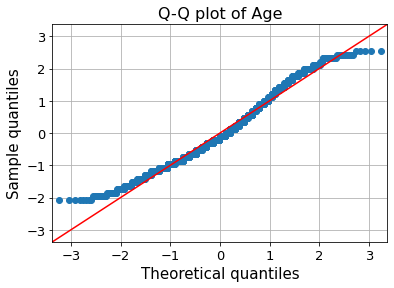

<Figure size 576x360 with 0 Axes>

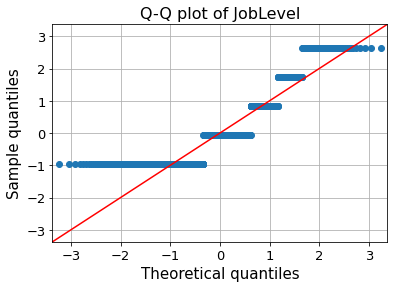

<Figure size 576x360 with 0 Axes>

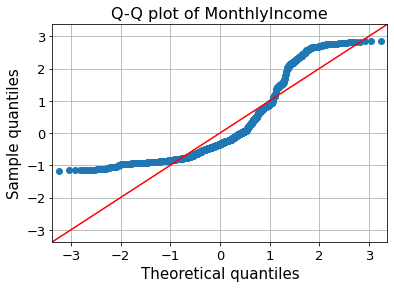

<Figure size 576x360 with 0 Axes>

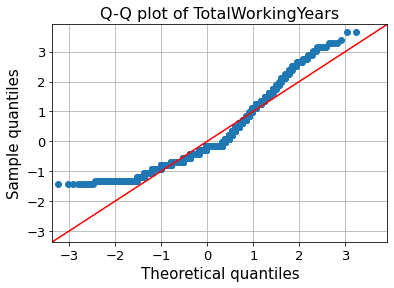

<Figure size 576x360 with 0 Axes>

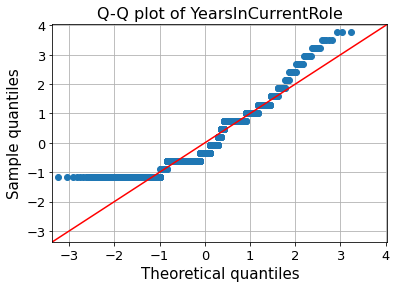

<Figure size 576x360 with 0 Axes>

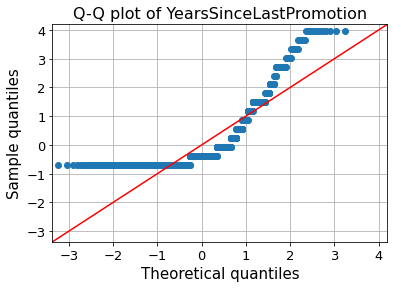

<Figure size 576x360 with 0 Axes>

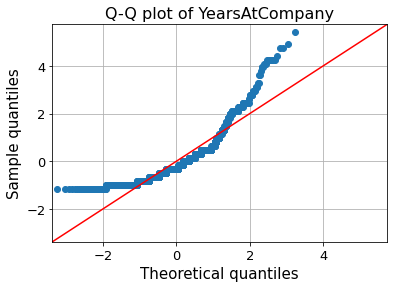

<Figure size 576x360 with 0 Axes>

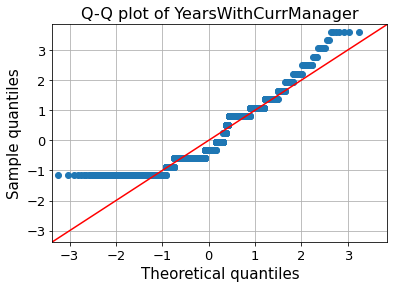

In [45]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm=df[['Age', 'JobLevel', 'MonthlyIncome', 'TotalWorkingYears' , 'YearsInCurrentRole' , 'YearsSinceLastPromotion' , 'YearsAtCompany' , 'YearsWithCurrManager']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

# **Outliers**


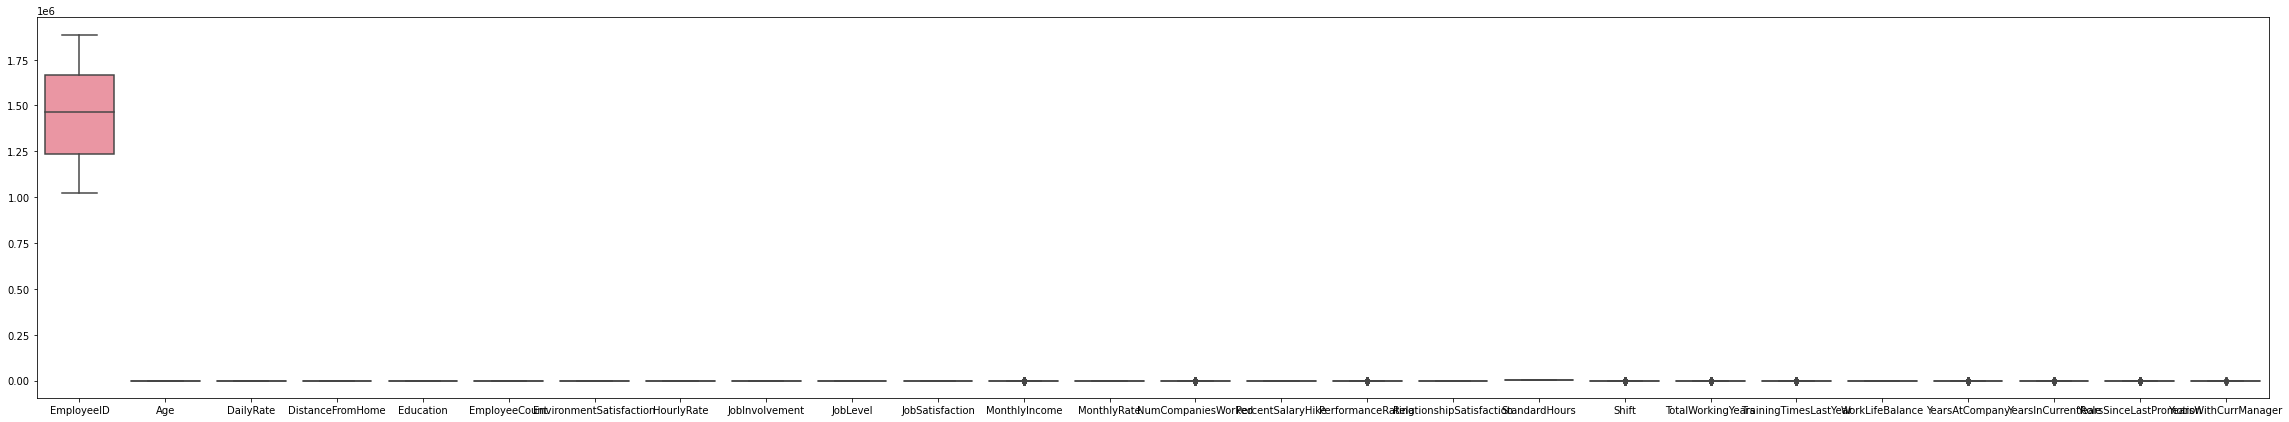

In [46]:
#Checking the Ranges of the predictor variables and dependent variable
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Normalization
employee_attr['Age'] = scaler.fit_transform(employee_attr[['Age']])
employee_attr['DailyRate'] = scaler.fit_transform(employee_attr[['DailyRate']])
employee_attr['DistanceFromHome'] = scaler.fit_transform(employee_attr[['DistanceFromHome']])
employee_attr['Education'] = scaler.fit_transform(employee_attr[['Education']])
employee_attr['HourlyRate'] = scaler.fit_transform(employee_attr[['HourlyRate']])
employee_attr['JobInvolvement'] = scaler.fit_transform(employee_attr[['JobInvolvement']])
employee_attr['JobLevel'] = scaler.fit_transform(employee_attr[['JobLevel']])
employee_attr['JobSatisfaction'] = scaler.fit_transform(employee_attr[['JobSatisfaction']])
employee_attr['MonthlyIncome'] = scaler.fit_transform(employee_attr[['MonthlyIncome']])
employee_attr['MonthlyRate'] = scaler.fit_transform(employee_attr[['MonthlyRate']])
employee_attr['NumCompaniesWorked'] = scaler.fit_transform(employee_attr[['NumCompaniesWorked']])
employee_attr['PercentSalaryHike'] = scaler.fit_transform(employee_attr[['PercentSalaryHike']])
employee_attr['PerformanceRating'] = scaler.fit_transform(employee_attr[['PerformanceRating']])
employee_attr['RelationshipSatisfaction'] = scaler.fit_transform(employee_attr[['RelationshipSatisfaction']])
employee_attr['Shift'] = scaler.fit_transform(employee_attr[['Shift']])
employee_attr['TotalWorkingYears'] = scaler.fit_transform(employee_attr[['TotalWorkingYears']])
employee_attr['TrainingTimesLastYear'] = scaler.fit_transform(employee_attr[['TrainingTimesLastYear']])
employee_attr['WorkLifeBalance'] = scaler.fit_transform(employee_attr[['WorkLifeBalance']])
employee_attr['YearsAtCompany'] = scaler.fit_transform(employee_attr[['YearsAtCompany']])
employee_attr['YearsInCurrentRole'] = scaler.fit_transform(employee_attr[['YearsInCurrentRole']])
employee_attr['YearsSinceLastPromotion'] = scaler.fit_transform(employee_attr[['YearsSinceLastPromotion']])
employee_attr['YearsWithCurrManager'] = scaler.fit_transform(employee_attr[['YearsWithCurrManager']])

plt.figure(figsize=(40,7))
sns.boxplot(data=employee_attr)

# **Multi-Colinearity**

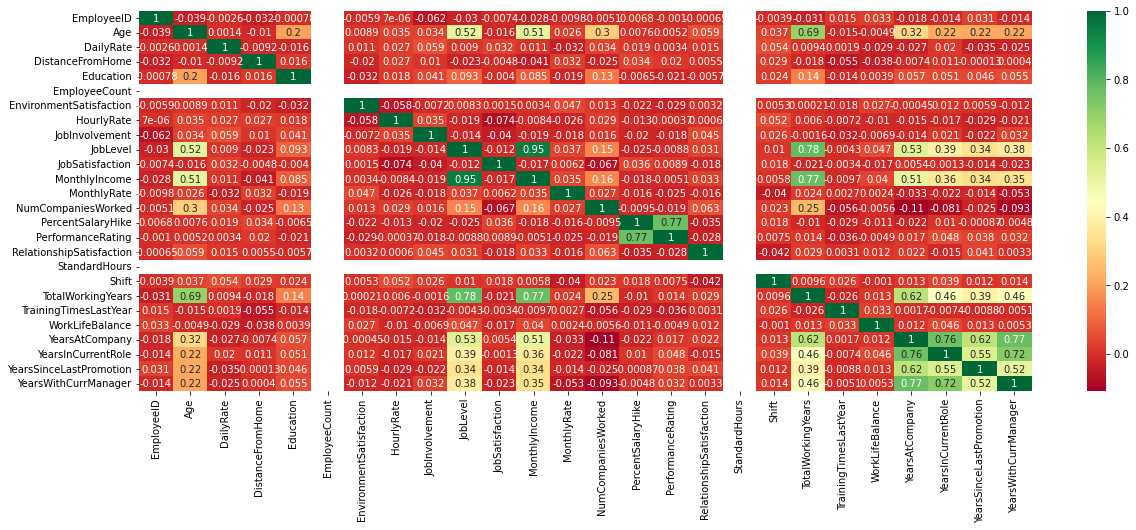

In [47]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(employee_attr.corr(), annot=True, cmap='RdYlGn')

#Binary Classification

**Target Label - Attrition**
Here we need to know: “Is this customer going to leave us?” Yes or No? 


In [48]:
#importing classification
from pycaret.classification import *

# Setting up the classifiers



In [49]:
clf1 = setup(data = employee_attr, 
             target = 'Attrition',
             normalize=True,
             normalize_method='minmax',
             remove_multicollinearity=True,
             fold=3,
             silent = True)

,Description,Value
0,session_id,4837
1,Target,Attrition
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(1676, 35)"
5,Missing Values,False
6,Numeric Features,22
7,Categorical Features,12
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Attrition',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_s...
                ('dummy', Dummify(target='Attrition')),
                ('fix_perfect', Remove_100(target='Attrition')),
                ('clean_names', Clean_Colum_Names()),

# Searching for the best models



In [50]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9335,0.9494,0.5733,0.8319,0.6754,0.6400,0.6555,0.2700
lda,Linear Discriminant Analysis,0.9190,0.9351,0.5318,0.7321,0.6119,0.5684,0.5796,0.0600
lr,Logistic Regression,0.9182,0.9354,0.4826,0.7580,0.5872,0.5446,0.5629,5.4233
gbc,Gradient Boosting Classifier,0.9182,0.9351,0.4478,0.7851,0.5687,0.5276,0.5537,0.5733
lightgbm,Light Gradient Boosting Machine,0.9113,0.9303,0.4546,0.7203,0.5569,0.5102,0.5273,0.8833
ridge,Ridge Classifier,0.9062,0.0000,0.2379,0.9762,0.3806,0.3499,0.4550,0.0333
et,Extra Trees Classifier,0.9003,0.9083,0.2800,0.7260,0.4031,0.3611,0.4104,0.4533
rf,Random Forest Classifier,0.8960,0.9204,0.2309,0.7145,0.3479,0.3084,0.3671,0.5167
knn,K Neighbors Classifier,0.8875,0.7082,0.1606,0.6503,0.2574,0.2202,0.2847,0.2900
dummy,Dummy Classifier,0.8781,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0300


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=4837)
INFO:logs:compare_models() succesfully completed......................................


# **Creating a model**
We will use Light GBM model

In [51]:
ada=create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9258,0.9473,0.5532,0.7647,0.6420,0.6018,0.6116
1,0.9437,0.9655,0.6667,0.8421,0.7442,0.7131,0.7192
2,0.9309,0.9355,0.5000,0.8889,0.6400,0.6051,0.6358
Mean,0.9335,0.9494,0.5733,0.8319,0.6754,0.6400,0.6555
Std,0.0075,0.0124,0.0695,0.0512,0.0487,0.0517,0.0461


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=4837)
INFO:logs:create_model() succesfully completed......................................


In [52]:
tuned_model = tune_model(ada)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9258,0.9507,0.5106,0.8000,0.6234,0.5845,0.6026
1,0.9361,0.9608,0.5833,0.8485,0.6914,0.6571,0.6714
2,0.9182,0.9465,0.4167,0.8333,0.5556,0.5159,0.5537
Mean,0.9267,0.9527,0.5035,0.8273,0.6234,0.5858,0.6092
Std,0.0073,0.0060,0.0682,0.0203,0.0554,0.0576,0.0483


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=0.4,
                   n_estimators=290, random_state=4837)
INFO:logs:tune_model() succesfully completed......................................


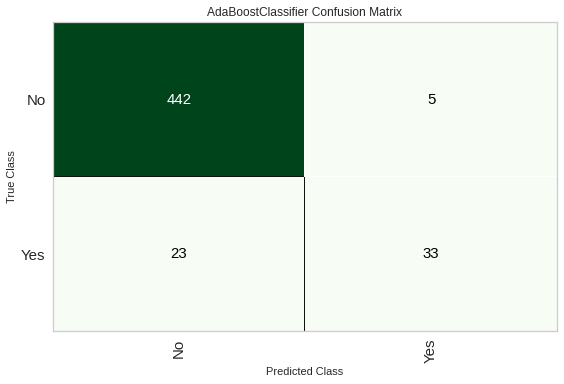

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [53]:
#Plotting the confusion Matrix
plot_model(estimator = tuned_model, plot = 'confusion_matrix')

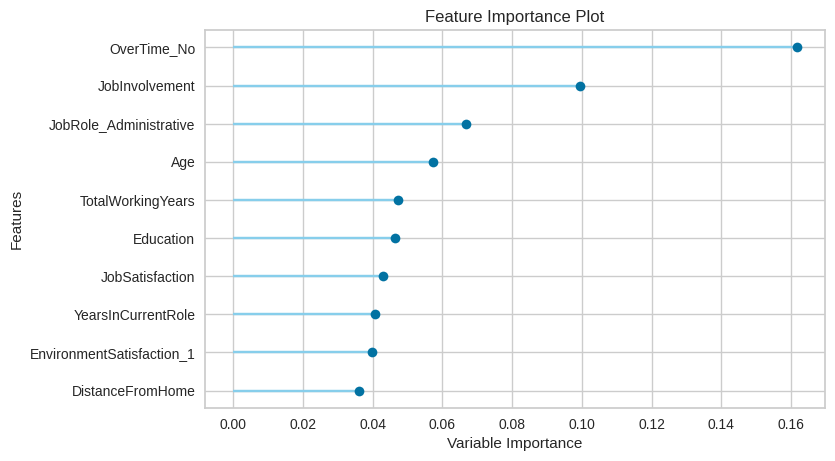

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [54]:
#Plotting Feature Importance
plot_model(estimator = tuned_model, plot = 'feature')

In [55]:
plot_model(tuned_model, plot = 'parameter')

,Parameters
algorithm,SAMME
base_estimator,None
learning_rate,0.4
n_estimators,290
random_state,4837


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


# Answers to Binary Classification

* Is the relationship significant? 

-> Yes, features are used for predicting Attrition

---

* Are any model assumptions violated?

-> Assumptions for models like linear regression:
1.   There is a linear relationship
2.   Standardized/Normalized input predictor variables
3.   No or minimal multicolinearity exists among predictor variables
4.   Training size is sufficiently large.

  While Setting up the classifier, we have normalized the predictors, attempted to eliminate multicolinearity, adjust the train test split to avoid any model violations.

---

* Is there any multicollinearity in the model?

-> Yes, multicolinearity exists in the data.

---

* In the multivariate models are predictor variables independent of all the other predictor variables?

-> In the data, predictor variables are depedent on each other.
We use remove_multicolinearity to eliminate the highly corelated predictor variables

---

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

-> The most important features are :
1. DailyRate 
2. Job Level 
3. Overtime_No 
4. DistanceFromHome
5. Age 
6. Job Involvement

---

* Does the model make sense?

-> Yes, the attrition prediction model makes sense as it has this accuracy and are able to correctly classify and predictor the Customers that will leave.

---

* Does regularization help?

->No regularization decreased the F1 score of the Light GBM model from 0.6835 to 0.6749

---


* Which independent variables are significant?

->DailyRate ,Job Level ,Overtime_No ,DistanceFromHome, Age

---

* Which hyperparameters are important?

->Hyperparamemters such as learning_Rate and n_estimators are important.

# Regression

In [56]:
from pycaret.regression import *

In [57]:
reg = setup(data = employee_attr, 
            target = 'DailyRate',
            train_size=0.8,
            normalize=True,
            normalize_method='minmax',
            remove_multicollinearity=True,
            fold=5,
            silent = True)

,Description,Value
0,session_id,4978
1,Target,DailyRate
2,Original Data,"(1676, 35)"
3,Missing Values,False
4,Numeric Features,21
5,Categorical Features,13
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1340, 51)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='DailyRate',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('dummy', Dummify(target='DailyRate')),
                ('fix_perfect', Remove_100(target='DailyRate')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'p

In [58]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,8.250000e-01,9.363000e-01,9.672000e-01,4.210000e-02,0.5148,1.393600e+00,1.124
et,Extra Trees Regressor,7.975000e-01,9.358000e-01,9.670000e-01,4.210000e-02,0.4721,1.520600e+00,0.872
llar,Lasso Least Angle Regression,8.585000e-01,9.835000e-01,9.915000e-01,-6.400000e-03,0.6286,1.031200e+00,0.024
dummy,Dummy Regressor,8.585000e-01,9.835000e-01,9.915000e-01,-6.400000e-03,0.6286,1.031200e+00,0.022
en,Elastic Net,8.585000e-01,9.835000e-01,9.915000e-01,-6.400000e-03,0.6286,1.031200e+00,0.022
lasso,Lasso Regression,8.585000e-01,9.835000e-01,9.915000e-01,-6.400000e-03,0.6286,1.031200e+00,0.024
br,Bayesian Ridge,8.587000e-01,9.841000e-01,9.918000e-01,-7.000000e-03,0.6276,1.031200e+00,0.028
ada,AdaBoost Regressor,8.601000e-01,9.886000e-01,9.940000e-01,-1.160000e-02,0.5928,1.192400e+00,0.134
gbr,Gradient Boosting Regressor,8.594000e-01,1.017100e+00,1.007900e+00,-4.000000e-02,0.5077,1.646400e+00,0.320
omp,Orthogonal Matching Pursuit,8.733000e-01,1.020000e+00,1.009600e+00,-4.360000e-02,0.5648,1.276900e+00,0.024


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=4978, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [59]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.8382,0.9795,0.9897,0.0540,0.5172,1.2965
1,0.8124,0.8899,0.9433,0.0857,0.5116,1.1511
2,0.7966,0.8716,0.9336,0.0388,0.5066,1.8724
3,0.8184,0.9091,0.9535,0.0605,0.5070,1.3080
4,0.8592,1.0317,1.0157,-0.0285,0.5318,1.3400
Mean,0.8250,0.9363,0.9672,0.0421,0.5148,1.3936
Std,0.0217,0.0601,0.0308,0.0384,0.0093,0.2481


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=4978, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [60]:
tuned_model = tune_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.8646,1.0193,1.0096,0.0155,0.5697,1.3021
1,0.8374,0.9477,0.9735,0.0263,0.5542,1.0807
2,0.8056,0.8834,0.9399,0.0257,0.5522,1.3726
3,0.8636,0.9854,0.9927,-0.0184,0.5564,1.2390
4,0.8687,1.0238,1.0118,-0.0207,0.5714,1.5819
Mean,0.8480,0.9719,0.9855,0.0057,0.5608,1.3153
Std,0.0239,0.0520,0.0266,0.0210,0.0081,0.1646


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=8, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0002,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=110, n_jobs=-1, oob_score=False,
                      random_state=4978, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


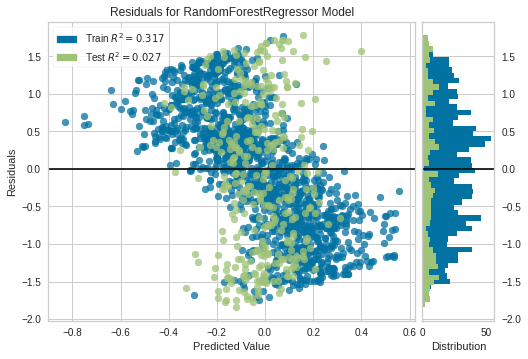

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [61]:
plot_model(estimator = tuned_model, plot = 'residuals')

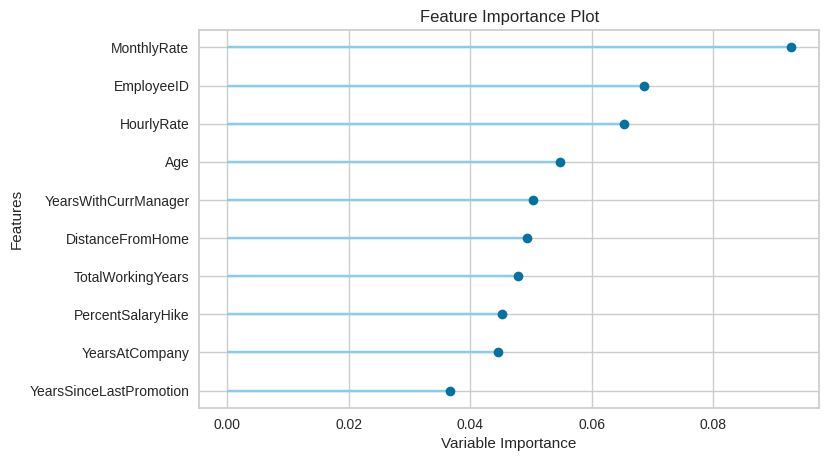

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [62]:
plot_model(estimator = tuned_model, plot = 'feature')

## Answers for Regression Model
* Is the relationship significant?

-> Yes, we can accurately predict the DailyRatwe Charges with minimum deviations with the features such as Monthly Income, MonthlyRate.

---

* Are any model assumptions violated?

->We have used the Pycaret library for the avoiding any model violation
1.   Normalized the numeric predictor variables
2.   Transformed the target variable using Box Cox transformation.
3.   Adjust the train test split to ensure sufficient training and test data size
4.   Use 5 fold cross validation to eliminate any test set bias.
5.   Remove multicolinearity from the model.

---

* Is there any multicollinearity in the model?

-> Yes, multicolinearity exists in the data.

---

* In the multivariate models are predictor variables independent of all the other predictor variables?

-> In the data, predictor variables are depedent on each other.
We use remove_multicolinearity to eliminate the highly corelated predictor variables

---

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

-> Most important Features are:
1. Monthly Income
2. Monthly Rate
3. DistanceFromHome
4. Age
5. YearsInCurrentRole
6. TotalWorkingYears

To eliminate insignificant features from the model we use feature selection while setting up the Pycaret model. 

---

* Does the model make sense?

-> Yes, the atrrition prediction model makes sense as it has this accuracy and are able to correctly classify and predictor the Customers that will leave the company.

---

* Does regularization help?

->Yes, the regularization increased the RMSLE score of the Light GBM model signficantly from 0.4956 to 0.5387

---

* Which independent variables are significant?

-> Monthly Income, Monthly Rate, DistanceFromHome, Age, YearsInCurrentRole, TotalWorkingYears are important independent variable for predicting the Monthly Charges.

---

* Which hyperparameters are important?

-> Important Hyperparameters are  min_child_samples, n_estimators, num_leave



# MultiClass Classification



In [63]:
#importing classification
from pycaret.classification import *

In [64]:
employee_attr['Age'].quantile(0.33)

-0.5332165570720859

In [65]:
employee_attr['Age'].quantile(0.67)

0.34336112772714444

In [66]:
employee_attr['Age_bracket']=np.where(employee_attr['Age']>=employee_attr['Age'].quantile(0.67),"High","Medium")
employee_attr['Age_bracket']=np.where(employee_attr['Age']<employee_attr['Age'].quantile(0.33),"Low",employee_attr['Age_bracket'])

For muticlass classifiation we need to have 2 or more categorical values, but my dataset only has one.  So we changed the Age to age_bracket and gave it 3 values low,medium,high.

In [67]:
employee_attr

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_bracket
0,1313919,0.452933,No,Travel_Rarely,0.750837,Cardiology,-1.008126,-0.884927,Life Sciences,1,...,80,-0.942491,-0.426280,-2.178097,-2.515254,-0.169491,-0.073053,-0.681553,0.242949,High
1,1200302,1.329511,No,Travel_Frequently,-1.299105,Maternity,-0.149829,-1.860033,Life Sciences,1,...,80,0.226728,-0.170938,0.151012,0.333101,0.486551,0.754220,-0.371823,0.804968,High
2,1060315,0.014644,Yes,Travel_Rarely,1.425849,Maternity,-0.885512,-0.884927,Other,1,...,80,-0.942491,-0.553950,0.151012,0.333101,-1.153553,-1.176083,-0.681553,-1.162098,Medium
3,1272912,-0.423644,No,Travel_Frequently,1.473174,Maternity,-0.762898,1.065286,Life Sciences,1,...,80,-0.942491,-0.426280,0.151012,0.333101,0.158530,0.754220,0.247636,-1.162098,Medium
4,1414939,-1.081078,No,Travel_Rarely,-0.521970,Maternity,-0.885512,-1.860033,Medical,1,...,80,0.226728,-0.681621,0.151012,0.333101,-0.825533,-0.624568,-0.062094,-0.600079,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,-1.190650,Yes,Travel_Rarely,-0.820869,Neurology,1.811993,0.090180,Technical Degree,1,...,80,-0.942491,-1.319974,0.151012,-2.515254,-0.989543,-1.176083,-0.681553,-1.162098,Low
1672,1152327,1.000794,No,Travel_Rarely,0.808126,Cardiology,0.095399,0.090180,Marketing,1,...,80,0.226728,0.467414,0.151012,0.333101,-0.661522,-0.624568,-0.371823,-0.600079,High
1673,1812428,-1.848083,No,Travel_Rarely,0.394650,Maternity,-1.008126,0.090180,Life Sciences,1,...,80,-0.942491,-1.319974,-2.178097,1.757279,-0.989543,-1.176083,-0.681553,-1.162098,Low
1674,1812429,0.233789,No,Travel_Rarely,-0.833323,Neurology,-1.008126,-1.860033,Life Sciences,1,...,80,0.226728,1.233438,0.151012,0.333101,2.290667,0.478462,2.725472,1.085977,Medium


In [68]:
employee_attr.drop(columns = ["Age"],inplace = True)

In [69]:
print("Distribution of Age Brackets:")
print(round(employee_attr['Age_bracket'].value_counts(normalize=True) * 100,2))

Distribution of Age Brackets:
High      35.20
Medium    33.17
Low       31.62
Name: Age_bracket, dtype: float64


In [70]:
employee_attr

,EmployeeID,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_bracket
0,1313919,No,Travel_Rarely,0.750837,Cardiology,-1.008126,-0.884927,Life Sciences,1,2,...,80,-0.942491,-0.426280,-2.178097,-2.515254,-0.169491,-0.073053,-0.681553,0.242949,High
1,1200302,No,Travel_Frequently,-1.299105,Maternity,-0.149829,-1.860033,Life Sciences,1,3,...,80,0.226728,-0.170938,0.151012,0.333101,0.486551,0.754220,-0.371823,0.804968,High
2,1060315,Yes,Travel_Rarely,1.425849,Maternity,-0.885512,-0.884927,Other,1,4,...,80,-0.942491,-0.553950,0.151012,0.333101,-1.153553,-1.176083,-0.681553,-1.162098,Medium
3,1272912,No,Travel_Frequently,1.473174,Maternity,-0.762898,1.065286,Life Sciences,1,4,...,80,-0.942491,-0.426280,0.151012,0.333101,0.158530,0.754220,0.247636,-1.162098,Medium
4,1414939,No,Travel_Rarely,-0.521970,Maternity,-0.885512,-1.860033,Medical,1,1,...,80,0.226728,-0.681621,0.151012,0.333101,-0.825533,-0.624568,-0.062094,-0.600079,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,Yes,Travel_Rarely,-0.820869,Neurology,1.811993,0.090180,Technical Degree,1,3,...,80,-0.942491,-1.319974,0.151012,-2.515254,-0.989543,-1.176083,-0.681553,-1.162098,Low
1672,1152327,No,Travel_Rarely,0.808126,Cardiology,0.095399,0.090180,Marketing,1,3,...,80,0.226728,0.467414,0.151012,0.333101,-0.661522,-0.624568,-0.371823,-0.600079,High
1673,1812428,No,Travel_Rarely,0.394650,Maternity,-1.008126,0.090180,Life Sciences,1,4,...,80,-0.942491,-1.319974,-2.178097,1.757279,-0.989543,-1.176083,-0.681553,-1.162098,Low
1674,1812429,No,Travel_Rarely,-0.833323,Neurology,-1.008126,-1.860033,Life Sciences,1,4,...,80,0.226728,1.233438,0.151012,0.333101,2.290667,0.478462,2.725472,1.085977,Medium


In [71]:
clf1 = setup(data = employee_attr, 
             target = 'Age_bracket',
             normalize=True,
             normalize_method='minmax',
             remove_multicollinearity=True,
             fold=5,
             silent = True)

,Description,Value
0,session_id,5129
1,Target,Age_bracket
2,Target Type,Multiclass
3,Label Encoded,"High: 0, Low: 1, Medium: 2"
4,Original Data,"(1676, 35)"
5,Missing Values,False
6,Numeric Features,21
7,Categorical Features,13
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Age_bracket', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric...
                ('dummy', Dummify(target='Age_bracket')),
                ('fix_perfect', Remove_100(target='Age_bracket')),
                ('clean_names', Clean_Colum_Names

In [72]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6317,0.8253,0.6300,0.6266,0.6262,0.4466,0.4488,0.390
et,Extra Trees Classifier,0.6266,0.8173,0.6257,0.6243,0.6245,0.4392,0.4399,0.338
lightgbm,Light Gradient Boosting Machine,0.6163,0.8107,0.6159,0.6164,0.6143,0.4244,0.4258,0.290
gbc,Gradient Boosting Classifier,0.6096,0.7998,0.6103,0.6125,0.6093,0.4146,0.4158,1.088
ridge,Ridge Classifier,0.5746,0.0000,0.5750,0.5685,0.5677,0.3624,0.3650,0.020
lr,Logistic Regression,0.5686,0.7593,0.5685,0.5700,0.5683,0.3528,0.3534,0.144
lda,Linear Discriminant Analysis,0.5686,0.7652,0.5703,0.5873,0.5729,0.3545,0.3573,0.032
dt,Decision Tree Classifier,0.5516,0.6641,0.5495,0.5534,0.5520,0.3265,0.3268,0.034
svm,SVM - Linear Kernel,0.5388,0.0000,0.5389,0.5000,0.4993,0.3091,0.3336,0.060
nb,Naive Bayes,0.5064,0.7348,0.5165,0.6068,0.4939,0.2686,0.2881,0.022


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5129, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


## Create a Model
We will create a LightGBM model 

In [73]:
lgbm=create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6340,0.8217,0.6316,0.6326,0.6333,0.4502,0.4503
1,0.6383,0.8070,0.6379,0.6456,0.6405,0.4579,0.4589
2,0.6298,0.8225,0.6316,0.6385,0.6314,0.4457,0.4474
3,0.5641,0.7869,0.5623,0.5537,0.5556,0.3451,0.3472
4,0.6154,0.8153,0.6163,0.6116,0.6107,0.4232,0.4252
Mean,0.6163,0.8107,0.6159,0.6164,0.6143,0.4244,0.4258
Std,0.0272,0.0131,0.0278,0.0333,0.0310,0.0413,0.0408


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5129, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [74]:
tuned_model = tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6468,0.8154,0.6462,0.6498,0.6473,0.4705,0.4711
1,0.6340,0.7985,0.6347,0.6444,0.6353,0.4524,0.4550
2,0.6213,0.8270,0.6229,0.6331,0.6240,0.4330,0.4350
3,0.5769,0.7918,0.5742,0.5657,0.5688,0.3644,0.3662
4,0.6325,0.8002,0.6326,0.6302,0.6286,0.4489,0.4510
Mean,0.6223,0.8066,0.6221,0.6246,0.6208,0.4338,0.4356
Std,0.0241,0.0128,0.0251,0.0303,0.0272,0.0367,0.0366


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=16, min_child_weight=0.001, min_split_gain=0.1,
               n_estimators=240, n_jobs=-1, num_leaves=80, objective=None,
               random_state=5129, reg_alpha=0.001, reg_lambda=1, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


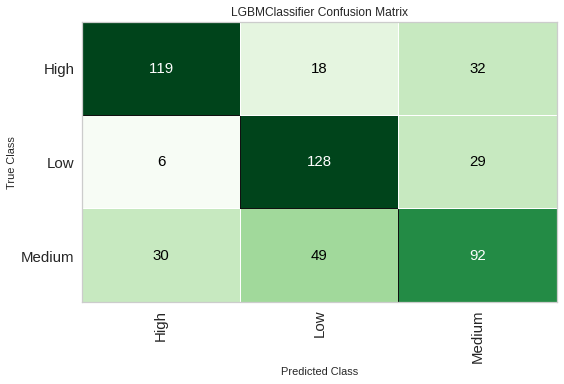

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [75]:
#Plotting the confusion Matrix
plot_model(estimator = tuned_model, plot = 'confusion_matrix')

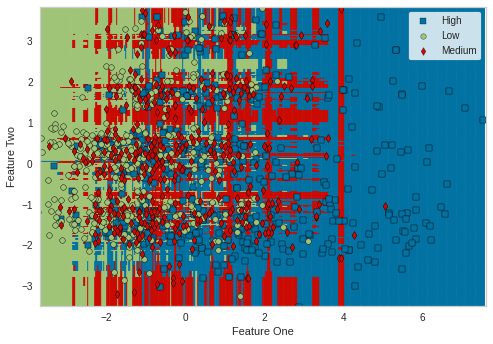

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [76]:
#plotting decision boundary
plot_model(estimator = tuned_model, plot = 'boundary', use_train_data = True)

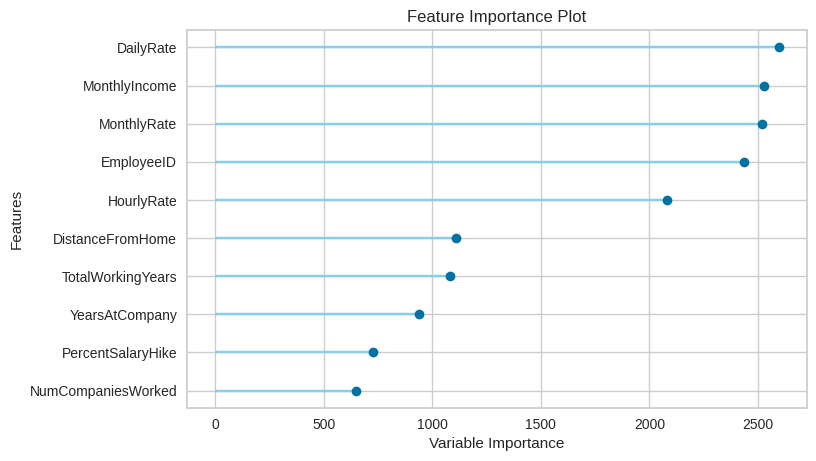

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [77]:
#Plotting Feature Importance
plot_model(estimator = tuned_model, plot = 'feature')

## Answers for model used for Multiclass Classification
* Is the relationship significant?

-> Yes, features like ... are used for predicting churn

---

* Are any model assumptions violated?

->-> Assumptions for models like linear regression:
1.   There is a linear relationship
2.   Standardized/Normalized input predictor variables
3.   No or minimal multicolinearity exists among predictor variables
4.   Training size is sufficiently large.

  While Setting up the classifier, we have normalized the predictors, attempted to eliminate multicolinearity, adjust the train test split to avoid any model violations.

---

* Is there any multicollinearity in the model?

-> Yes, multicolinearity exists in the data.

---

* In the multivariate models are predictor variables independent of all the other predictor variables?

-> In the data, predictor variables are depedent on each other.
We use remove_multicolinearity to eliminate the highly corelated predictor variables

---

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

-> The most important features are :
1. DailyRate
2. MonthlyIncome
3. MonthlyRate
4. HourlyRate
5. DistanceFromHome
6. TotalWorkingYears

---

* Does the model make sense?

-> Yes, the attrition prediction model makes sense as it has this accuracy and are able to correctly classify and predictor the Customers that will leave the company.

---

* Does regularization help?

->No, the regularization decreased the F1 score of the Light GBM model from 0.6364 to 0.6298 , so in this case regularization didnt help.

---

* Which independent variables are significant?

-> DailyRate, MonthlyIncome, MonthlyRate, HourlyRate, DistanceFromHome, TotalWorkingYears are important

---

* Which hyperparameters are important?

->The number of estimators, regularization parameters alpha and lambda, num_leaves are important hyperparameters


# **Model Interpretability**

# **INTRODUCTION**

Employee attrition is the process through which workers leave a company for whatever cause (voluntarily or involuntarily), such as retirement, termination, death, or resignation. The attrition rate is calculated by dividing the rate at which employees depart a business by the typical number of employees over a specific time period. The Notebook's objective is to assess the data's quality and decide which characteristics are crucial. To address the following queries regarding the dataset, the notebook has utilized statistical techniques such as p-value, t-statistics, and visualization techniques such as Q-Q plot, scatter plot, and box-plot of Python's matplotlib and Seaborn library.

**Data Set**

The data set consists of :

1. 8 characteristics of attrition i.e. Age, JobLevel, MonthlyIncome, TotalWorkingYears, YearsInCurrentRole, YearsSinceLastPromotion, YearsAtCompany, YearsWithCurrManager - The independent variables.

2. Attriton yes or no - The dependent variable.

3. There are a total of 1676 observations.





# **Goal of creating this Notebook🎯**

Interpret the models.

1. Fit a linear model and interpret the regression coefficients

2. Fit a tree-based model and interpret the nodes

3.  Use auto ml to find the best model

4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.



In [78]:
#Installing SHAP
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [161]:
from google.colab import files 
uploaded = files.upload()

Saving watson_healthcare_modified.csv to watson_healthcare_modified (7).csv


In [162]:
#Reading the Employee Attrition dataset.
emp=pd.read_csv("/content/watson_healthcare_modified.csv")

In [163]:
emp

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8


In [164]:
emp.Attrition = emp.Attrition.map(dict(Yes=1, No=0))

In [165]:
emp

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,0,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,0,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,1,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,0,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,0,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,1,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,0,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,0,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,0,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8


# **Analyzing the numeric features**




<Figure size 576x360 with 0 Axes>

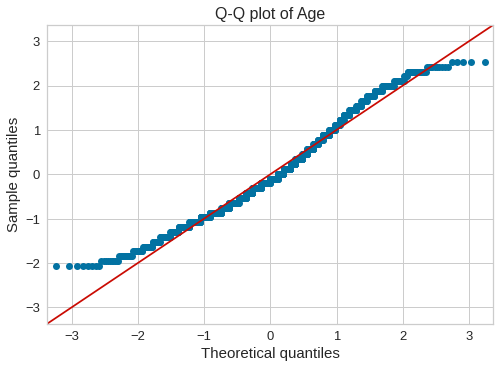

<Figure size 576x360 with 0 Axes>

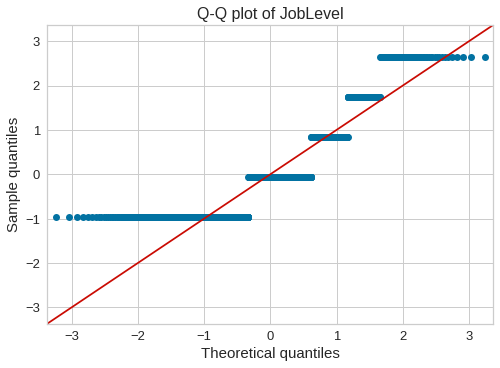

<Figure size 576x360 with 0 Axes>

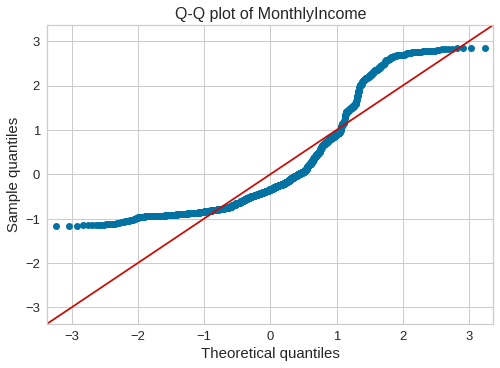

<Figure size 576x360 with 0 Axes>

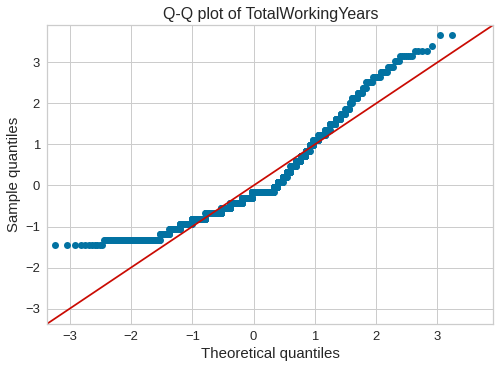

<Figure size 576x360 with 0 Axes>

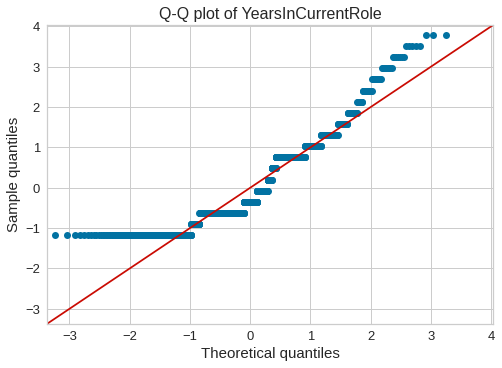

<Figure size 576x360 with 0 Axes>

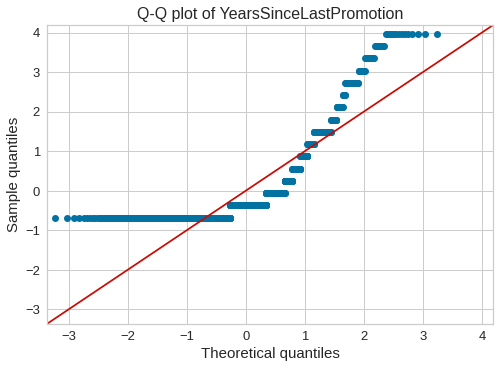

<Figure size 576x360 with 0 Axes>

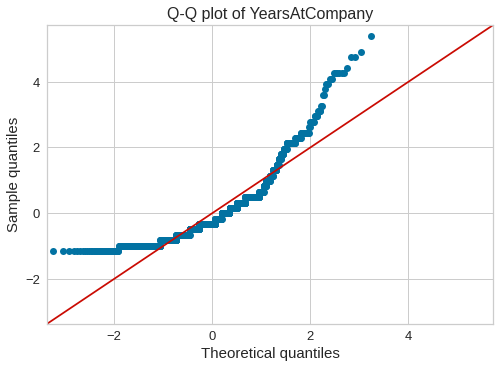

<Figure size 576x360 with 0 Axes>

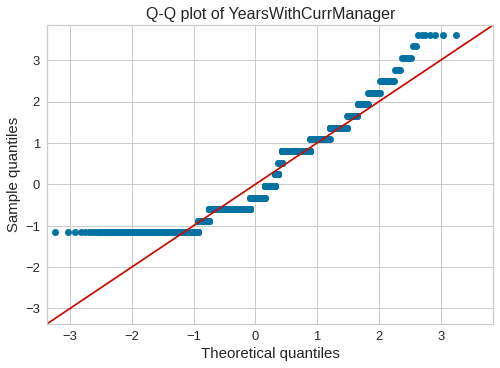

In [166]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm=employee_attr[['Age', 'JobLevel', 'MonthlyIncome', 'TotalWorkingYears' , 'YearsInCurrentRole' , 'YearsSinceLastPromotion' , 'YearsAtCompany' , 'YearsWithCurrManager']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

**Observation:**

There is no normal distribution for these numerical variables. These distributions show that there are various data distributions with distinct and independent peaks found in population data.


**Action:**

scaling of data, We normalize these features since the majority of algorithms assume that the data is normally (Gaussian) distributed.

# **IDENTIFYING PREDICTOR SIGNIFICANCE**

In [167]:
emp_df=pd.get_dummies(employee_attr)

In [169]:
#Viewing the correlation between every single features in the data.
emp_df.corr()

,EmployeeID,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
EmployeeID,1.000000,-0.039033,-0.002558,-0.031648,-0.000781,NaN,-0.005930,0.000007,-0.062473,-0.030085,...,0.018420,-0.032852,0.022057,0.011081,0.000210,-0.017187,0.018318,NaN,0.027952,-0.027952
Age,-0.039033,1.000000,0.001441,-0.010079,0.204655,NaN,0.008945,0.034671,0.034193,0.518333,...,0.254053,-0.082670,-0.115285,0.066814,0.025896,0.087163,-0.117209,NaN,-0.030970,0.030970
DailyRate,-0.002558,0.001441,1.000000,-0.009227,-0.015881,NaN,0.010620,0.027128,0.058864,0.009005,...,-0.029636,0.014515,0.008571,-0.016433,0.049534,0.033362,-0.080588,NaN,-0.013474,0.013474
DistanceFromHome,-0.031648,-0.010079,-0.009227,1.000000,0.015937,NaN,-0.019730,0.026947,0.010281,-0.023455,...,-0.005361,0.061984,-0.055037,0.002787,-0.014311,0.022965,-0.011827,NaN,-0.038182,0.038182
Education,-0.000781,0.204655,-0.015881,0.015937,1.000000,NaN,-0.031925,0.017996,0.041046,0.093227,...,0.058999,0.015153,-0.039476,-0.011994,-0.002974,-0.003665,0.006628,NaN,0.025776,-0.025776
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,-0.005930,0.008945,0.010620,-0.019730,-0.031925,NaN,1.000000,-0.057505,-0.007220,0.008277,...,-0.004736,-0.013666,-0.017158,0.053129,0.022820,-0.026605,0.008074,NaN,-0.076885,0.076885
HourlyRate,0.000007,0.034671,0.027128,0.026947,0.017996,NaN,-0.057505,1.000000,0.034741,-0.018830,...,0.016232,0.009897,-0.007548,-0.017635,-0.015792,0.041855,-0.030832,NaN,0.015575,-0.015575
JobInvolvement,-0.062473,0.034193,0.058864,0.010281,0.041046,NaN,-0.007220,0.034741,1.000000,-0.013660,...,0.005395,-0.026584,0.042837,-0.018532,0.019411,0.033053,-0.053094,NaN,0.014960,-0.014960
JobLevel,-0.030085,0.518333,0.009005,-0.023455,0.093227,NaN,0.008277,-0.018830,-0.013660,1.000000,...,0.509565,-0.140393,-0.268842,0.148062,0.030563,0.055978,-0.087837,NaN,-0.006171,0.006171


In [170]:
Y=emp["Attrition"].values
X=emp_df.copy()

In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

# Logistic Regression

In [172]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

# Print the prediction accuracy
from sklearn import metrics
prediction_test = model.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8902147971360382


# COEFFICIENTS

In [173]:
coef=pd.DataFrame(zip(X_train.columns, np.transpose(model.coef_[0])), columns=['features', 'coef']).sort_values(by=['coef'])

In [138]:
coef.head(50)

,features,coef
1,Age,-0.047800
19,TotalWorkingYears,-0.027768
22,YearsAtCompany,-0.024416
25,YearsWithCurrManager,-0.016886
23,YearsInCurrentRole,-0.016353
17,StandardHours,-0.012825
26,Attrition_No,-0.010941
7,HourlyRate,-0.009936
51,OverTime_No,-0.005850
8,JobInvolvement,-0.004832


# Decision Tree

In [174]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(max_depth=5)

# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)

#Predict for test dataset
y_pred = dt.predict(X_test)

# Print the prediction accuracy
print (metrics.accuracy_score(y_test, y_pred))

1.0


In [175]:
# importing classification
from pycaret.classification import *

In [176]:
emp

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,0,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,0,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,1,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,0,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,0,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,1,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,0,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,0,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,0,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8


# Setting up the classifier

In [177]:
clf1 = setup(data = emp, 
             target = 'Attrition',
             normalize=True,
             normalize_method='minmax',
             remove_multicollinearity=True,
             fold=3,
             silent = True)

,Description,Value
0,session_id,2521
1,Target,Attrition
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1676, 35)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,25
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Attrition',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_s...
                ('dummy', Dummify(target='Attrition')),
                ('fix_perfect', Remove_100(target='Attrition')),
                ('clean_names', Clean_Colum_Names()),

# Model Comparison & Evaluation

In [178]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9318,0.9505,0.6137,0.7684,0.6780,0.6406,0.6481,1.1767
gbc,Gradient Boosting Classifier,0.9258,0.9246,0.4738,0.8096,0.5975,0.5598,0.5844,0.4233
lda,Linear Discriminant Analysis,0.9250,0.9357,0.6422,0.6952,0.6674,0.6252,0.6260,0.0567
ada,Ada Boost Classifier,0.9207,0.9185,0.5396,0.7135,0.6142,0.5710,0.5780,0.2067
lightgbm,Light Gradient Boosting Machine,0.9173,0.9105,0.4303,0.7593,0.5486,0.5069,0.5321,0.3600
ridge,Ridge Classifier,0.9165,0.0000,0.3725,0.8046,0.5080,0.4694,0.5116,0.0267
et,Extra Trees Classifier,0.9079,0.9032,0.2554,0.8548,0.3928,0.3584,0.4365,0.2867
rf,Random Forest Classifier,0.9045,0.9070,0.2188,0.8561,0.3485,0.3160,0.4038,0.3267
knn,K Neighbors Classifier,0.8994,0.7252,0.2116,0.7546,0.3303,0.2936,0.3647,0.1833
svm,SVM - Linear Kernel,0.8968,0.0000,0.7311,0.6087,0.6303,0.5743,0.5982,0.0333


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2521, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


# Hyperparameter Tuning

In [179]:
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9207,0.9610,0.7778,0.6250,0.6931,0.6482,0.6533
1,0.8977,0.9234,0.5870,0.5625,0.5745,0.5164,0.5165
2,0.9437,0.9524,0.6522,0.8333,0.7317,0.7008,0.7074
Mean,0.9207,0.9456,0.6723,0.6736,0.6664,0.6218,0.6257
Std,0.0188,0.0161,0.0792,0.1158,0.0669,0.0776,0.0803


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=5.390000000000001, class_weight={}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2521, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [180]:
tuned_model.predict

<bound method LinearClassifierMixin.predict of LogisticRegression(C=5.390000000000001, class_weight={}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2521, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [181]:
from sklearn.ensemble import GradientBoostingClassifier # Import Gradient Boosting Classifier

# Create Decision Tree classifer object
best = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=7,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.02, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=230,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=8292, subsample=0.35, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

# Train Decision Tree Classifer
best = best.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = best.predict(X_test)

# Print the prediction accuracy
print (metrics.accuracy_score(y_test, y_pred))

1.0


In [182]:
#Installing support library
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Interpret Logistic Regression Model using SHAP

In [183]:
import shap

In [184]:
X100 = shap.utils.sample(X, 100) # 100 instances for use as the background distribution
sample_ind = 20

In [185]:
# compute the SHAP values for the linear model
explainer_model = shap.Explainer(model.predict, X100)
shap_values_model = explainer_model(X_train)

Permutation explainer: 1258it [01:57, 10.18it/s]


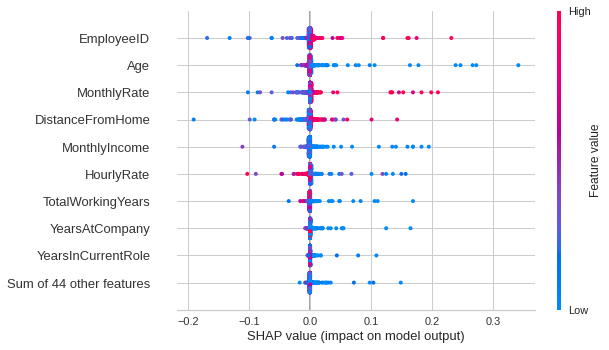

In [186]:
shap.plots.beeswarm(shap_values_model)


# Interpreting Decision Tree Model using SHAP


In [187]:
# compute the SHAP values for the linear model
explainer_dt = shap.Explainer(dt.predict, X100)
shap_values_dt = explainer_dt(X)

Permutation explainer: 1677it [01:22, 17.38it/s]


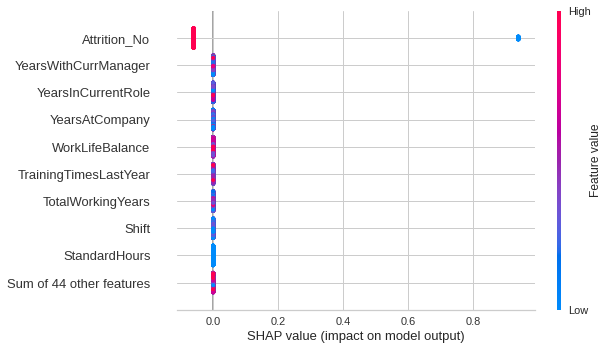

In [188]:
shap.plots.beeswarm(shap_values_dt)

As logistic Regression is the best model that we have and also used Auto ML to find the best model from that it is clear that Logistic regression is the best model.

So I have interpreted logistic Regression using SHAP

All the Goals of the notebook have been successfully completed.

# **LICENSE**   
Copyright (c) 2022 udayshelke

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.